# Salary vs Skills finding the median and comparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()
import ast
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill )

In [16]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [17]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [29]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

In [30]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

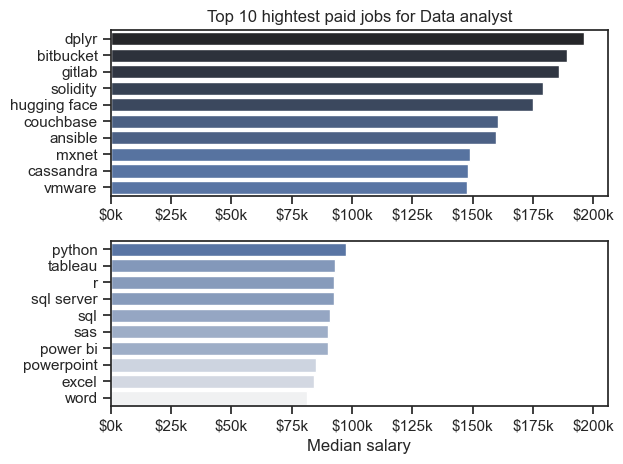

In [34]:
import seaborn as sns

sns.set_theme(style='ticks')
fig, ax = plt.subplots(2,1)
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)


ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 hightest paid jobs for Data analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
fig.tight_layout()
fig.savefig('top_skills.png', dpi=150)
plt.show()